Aleyna Akyüz 2018203021 aleynaakyuz1@gmail.com

In [0]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
import scipy.integrate as si

# General comments

- This midterm project is broadly similar to Homework 4. Understanding the solutions of that homework may help you with this project as well.
  - **BUT**: note that while there is some similarity, the problems here are actually **different** from those of Homework 4! 
  - So: Please read them carefully, don't blindly copy stuff from Homework 4!
- There are some **sanity checks** for you through the project. These are intended to help you check for certain types of error. The sanity checks are **required** parts of the project, unless explicitly stated otherwise.


# Problem 1: Four pendulums with springs

## Part 1-Introduction

Consider a system of **four** identical **pendulums** making small oscillations. Assume the pendulums are all oscillating in the same plane and are coupled to each other by three identical springs. Assume also that the springs are relaxed when the pendulums are in vertical position, so the system is in equilibrium when all pendulums are vertical.

As coordinates describing this system, we will use the horizontal displacements $x_i$ from the equilibrium locations of the particles $i=1, \ldots, 4$.

### Forces

Let $l$ be the length of the pendulum and $k$ be the spring constant. In the limit of small displacements, the forces on the masses are:
$$
\begin{eqnarray}
  F_1 &=& k(x_2-x_1) - \frac{mg}{l} x_1\\
  F_2 &=& k(x_3-x_2) + k(x_1-x_2) - \frac{mg}{l} x_2\\ 
  F_3 &=& k(x_2-x_3) + k(x_4-x_3) - \frac{mg}{l} x_3 \\ 
  F_4 &=& k(x_3-x_4) - \frac{mg}{l} x_4
\end{eqnarray}
$$



- Here, each spring is contributing a force proportional to the amount of stretch/squeeze from its relaxed size due to the displacements of the two masses it connects, and in addition, 
- there is a pendulum force for each mass.

### Equations of motion

We would like to solve the coupled equations of motion

$$
F_i = m x_i''
$$
for $i=1,2,3, 4$.

- As usual, we will use our trick of setting velocities as new variables, $x'=v$, in order to reduce the order of the equation.
- We have 4 **second order** equations (equations with second derivatives), so we will have 8 **first order** equations (equations with first derivatives).
- Let's write them out:

$$
\begin{eqnarray}
  x_1' &=& v_1 \\
  x_2' &=& v_2 \\
  x_3' &=& v_3 \\
  x_4' &=& v_4 \\
  \\
  v_1' &=& F_1 \\
  v_2' &=& F_2 \\
  v_3' &=& F_3 \\
  v_4' &=& F_4
\end{eqnarray}
$$
The first four equations are just the definition of the $v$ (velocity) variables. The last four are the equations of motion (Newton's equation), and the forces are to be submitted from the formulas we gave above.

### Fixing the constants

We will 
- pick $m=1$, 
- pick $k=1$, and 
- **replace** $g/l$ with a new constant $c$:
$$
  \frac{g}{l} = c \,.
$$

We will leave $c$ arbitrary for now, and set it to specific values below.





# Part 1a: Define the derivative function

We will use the grouping 
```
y = [x1, x2, x3, x4, v1, v2, v3, v4]
```
and the equations above, together with the fixed values of the constants mentioned, i.e., 
$$
\begin{eqnarray}
m&=&1 \\ 
k&=&1 \\
g/l &=& c\,.
\end{eqnarray}
$$

With these conditions, **define a Python function**
```
f_4mass(t, y)
```
that gives the right hand sides of the 8 first order equations above in terms of the entries of the `y` vector. 

This will allow us to represent the 8 equations as a single vector equation:
```
  y'(t) = f_4mass(t,y)
```

Just to reiterate:
- Your function `f_4mass(t, y)` should take in an 8-element vector `y`, whose entries are to be assumed as above, together with a time variable `t`, 
- it should return an 8-element vector consisting of the derivatives of the components of `y`, computed according to the equations above, and
- it should use the currently arbitrary constant $c$.

#### Solution

In [0]:
def f_4mass(t, y):
  f1=y[1]-y[0]*(1+c)
  f2=y[0]+y[2]-y[1]*(2+c)
  f3=y[1]+y[3]-y[2]*(2+c)
  f4=y[2]-y[3]*(1+c)
  return np.array([y[4], y[5], y[6], y[7], f1, f2, f3, f4])

In [0]:
# sanity check: when you use
#   c = 1
#   t = 0
#   y = [1,2,3,4,5,6,7,8]
# 
# the function f_4mass() should return the array
#
#   [5, 6, 7, 8, 0, -2, -3, -5]
#
# NOTE: don't neglect to DELETE the c variable after the sanity check! 
# to delete, use:
# 
#   del c

In [44]:
c = 1
t = 0
y = [1,2,3,4,5,6,7,8]
f_4mass(t, y)

array([ 5,  6,  7,  8,  0, -2, -3, -5])

In [0]:
del c

## Part 1b: Solve the equation for $c=0$

Now set $c=0$ and use `scipy.integrate.solve_ivp()` to get a solution to the equations of motion. For initial conditions, use:
- zero initial velocity for all four particles (masses), and
- 1 for the displacement of the first particle, and 
- zero for the displacements of the remaining three particles. 

In other words,

```
x1_init = 1
x2_init = 0
x3_init = 0
x4_init = 0

v1_init = 0
v2_init = 0
v3_init = 0
v4_init = 0
```

With these initial conditions, solve the equations of motion for `t` between 0 and 20. As always, do not forget to use `dense_output=True` in your call to `solve_ivp()`.

**Name your solution object `sol_1`**

- Note that **we will refer to this solution in other parts below**, so make sure you use exactly this name: `sol_1`.

#### Solution

In [0]:
c=0

sol_1=si.solve_ivp(f_4mass, t_span=[0, 20], y0=[1,0,0,0,0,0,0,0], dense_output=True)

## Part 1c: Plot the solution for c=0

Next, using the time span of the solution `[0, 20]`, plot the positions `x1`, `x2`, `x3`, and `x4` as function of time. Note that these are packaged into the 0th, 1st, 2nd, and 3rd entries of the motion vector.

To do this, 
- first create a NumPy array called `tplot` that contains the instants where you want to evaluate the positions
  - this should be an array of times between 0 and 20
  - make sure it has enough elements, say more than 100 
- then create an array called `yplot_1` that has the solution from Part 1b evaluated at these instants,
- finally, use the rows 0 to 3 (inclusive) of `yplot_1` to obtain the plots of x1 through x4. 

Note that `tplot` will be an array of length `n` of your choosing, and `yplot_1` will be an `8 x n` array consisting of the positions and velocities at each instant chosen in `tplot`. **We will make use of the variables `tplot` and `yplot_1` in other parts below** as well, so make sure you define them.
- Note that we are not using "1" in the variable name `tplot`, but there is a "1" in `yplot_1`

#### Solution

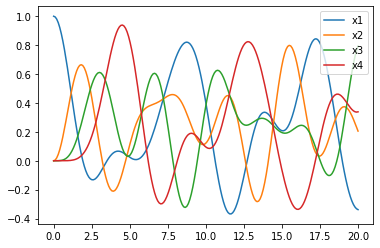

In [47]:
tplot=np.linspace(0, 20, 200)
yplot_1=sol_1.sol(tplot)
plt.plot(tplot, yplot_1[0], label='x1')
plt.plot(tplot, yplot_1[1], label='x2')
plt.plot(tplot, yplot_1[2], label='x3')
plt.plot(tplot, yplot_1[3], label='x4')
plt.legend()
plt.show()

In [0]:
# sanity check: in the plot, the first particle should 
# start at x=1, and the remaining 4 particles should start at x=0
# and the initial velocities should all be zero. check this visually yourself,
# and also evaluate the first column (i.e., column number zero) of `yplot_1` 
# and make sure it consists of a 1 and seven 0s

In [48]:
yplot_1[:, 0]

array([1., 0., 0., 0., 0., 0., 0., 0.])

## Part 1d: solve with c = 0.5

Next,  $c=0.5$ and use the same initial conditions as in Part 1b to get a solution to the equations of motion, once again for `t` between 0 and 20
- call your solution object `sol_2`

Note that **we will refer to this solution in other parts below**, so make sure you use exactly this name: `sol_2`.

#### Solution


In [0]:
c=0.5

sol_2=si.solve_ivp(f_4mass, [0, 20], [1, 0, 0, 0, 0, 0, 0, 0], dense_output=True)

## Part 1e: plot the solution for c=0.5

As in Part 1c, plot the `x1`, `x2`, `x3`, and `x4` motions, this time for the solution `sol_2`, which you got in Part 1d (for $c=0.5$).

Use the same `tplot` array you used in Part 1c, but this time, 

- create an array called `yplot_2` that contains the solution `sol_2` evaluated at the instants specified by `tplot`

Note that `yplot_2` will be a `8 x n` array consisting of the positions and velocities at each instant chosen in `tplot`.

**We will make use of the variable `yplot_2` in other parts below** as well, so make sure you define it.

#### Solution

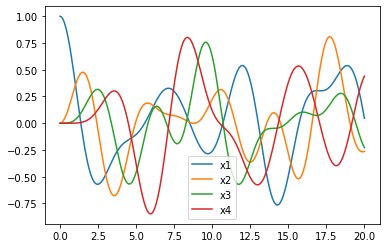

In [50]:
tplot=np.linspace(0, 20, 200)
yplot_2=sol_2.sol(tplot)
plt.plot(tplot, yplot_2[0], label='x1')
plt.plot(tplot, yplot_2[1], label='x2')
plt.plot(tplot, yplot_2[2], label='x3')
plt.plot(tplot, yplot_2[3], label='x4')
plt.legend()
plt.show()

In [0]:
# sanity check: the same sanity check as in Part 1c, the first particle should 
# start at x=1, and the remaining particles should start at x=0,
# and the initial velocities should all be zero. check this visually yourself,
# and also evaluate the first column of `yplot_2` and make sure it consists of 
# a 1 and seven 0s

In [51]:
yplot_2[:, 0]

array([1., 0., 0., 0., 0., 0., 0., 0.])

## Part 1f: Define the force matrix for c=0.5

Create a $4 \times 4$ NumPy array `M` such that the **forces on the four particles** are the result of this **matrix acting on the four positions**, for the case **c=0.5**. 

More explicitly, create `M` so that the following equation holds

$$
   \mathbf{F} = M \cdot \mathbf{x}
$$

Here, the dot "$\cdot$" denotes matrix multiplication, and

$$
  \mathbf{F} = \left[\begin{matrix}F_1\\F_2\\F_3\\F_4\end{matrix}\right],
$$

is the vector describing the **forces on the four particles** as defined in Part 1-Introduction, and

$$
  \mathbf{x} = \left[\begin{matrix}x_1\\x_2\\x_3\\x_4\end{matrix}\right]
$$
is the vector describing the **positions of the particles**.

In component form, we want our $\mathbf{F}$ to satisfy the following equation in terms of $M$ and $\mathbf{x}$:

$$
  F_i = \sum_{i=1}^4 M_{ij}x_j
$$

We will call the matrix `M` the **force matrix**.

**Note**:
- **Don't forget** that we want the matrix $M$ for $c=0.5$, **NOT** $c=0$!

#### Solution

In [52]:
M=np.array([[-1.5, 1, 0, 0], [1, -2.5, 1, 0], [0, 1, -2.5, 1], [0, 0, 1, -1.5]])
M

array([[-1.5,  1. ,  0. ,  0. ],
       [ 1. , -2.5,  1. ,  0. ],
       [ 0. ,  1. , -2.5,  1. ],
       [ 0. ,  0. ,  1. , -1.5]])

In [53]:
# sanity check: your M must be a symmetric matrix,
# so this should print True
print(np.allclose(M - M.T, 0))

True


## Note (interlude)

This is not strictly necessary for this midterm project, but if you would like to have a deeper understanding of what you are about to compute in the remaining parts of Problem 1, go back to Homework 4 and read the part titled "Interlude: A derivation for simple harmonic motion"



## Part 1e: Obtain the eigenvalues and eigenvectors of $-\mathbf{M}$

Find and print the eigenvalues and eigenvectors of **minus** $\mathbf{M}$ for $c=0.5$. Save the eigenvalues into the variable `val`, and the eigenvectors into the variable `vec`.
- Dont forget the minus!

Note that an eigenvector of $-\mathbf{M}$ describes the amplitudes of each mass for a motion where all three masses make simple harmonic oscillations in unison (with possibly different magnitudes and signs). The square root of the corresponding eigenvalue gives the frequency of that simple harmonic motion.

* Request by Irem: Once you get the eigenvectors, try to understand the "characteristic motions", or "normal modes" that are being described by the eigenvectors. Please write a verbal comment on what you understand (2-3 sentences are enough).

#### Solution

In [0]:
val, vec= np.linalg.eig(-M)

In [55]:
val 

array([3.91421356, 2.5       , 0.5       , 1.08578644])

In [56]:
vec #In the first eigenvector, first and fourth particles which have the same amplitudes are going to the opposite directions; and that is the case with the second and the third particles as well
    #In the second eigenvector first particle going in the same direction with fourth particle and second and third particles are going in the opposite direction to them. Also all amplitudes are the same.
    #In the third eigenvector all particles going in the same direction with same amplitude.
    #In the fourth eigenvector, first and fourth particles which have the same amplitudes are going to the opposite directions; and that is the case with the second and the third particles as well

array([[ 0.27059805,  0.5       , -0.5       , -0.65328148],
       [-0.65328148, -0.5       , -0.5       , -0.27059805],
       [ 0.65328148, -0.5       , -0.5       ,  0.27059805],
       [-0.27059805,  0.5       , -0.5       ,  0.65328148]])

In [57]:
# sanity check: you should have 4 eigenvalues, and all of them should be positive
# make sure that these conditions hold

print(len(val))

print((val > 0).all())

4
True


## Part 1f: Decompose the solution to the differential equation for $c=0.5$ into normal modes

In Part 1d, we defined the variables `tplot` and `yplot_2`:
 - `yplot_2` contains the positions and velocities evaluated at the instants of `tplot`, for the case $c=0.5$.

Now, at any given instant, the displacement vector $\mathbf{x} = [x_1, x_2, x_3, x_4]^T$ can be written as a linear combination of the four eigenvectors we found. In other words, the time-dependent displacements can be expanded in the **basis formed by the eigenvectors**. 

We will next obtain these eigenvector expansion coefficients for our particular solution found in Part 1d. 

Now,
- Your `yplot_2` array should be of the shape `8 x n`, where 
  - `n` is the number of instants you used for your `tplot` array, and 
  - `8 = (4 positions) + (4 velocities)`
- Extract the positions, i.e., the first four rows of `yplot_2`, and call the resuting array `xplot_2`. 
  - Thus, `xplot_2` should be a `4 x n` dimensional array.
- Use `np.matmul()` to define `xeigplot` to be the matrix product 
$$
\text{xeigpot} = \text{xplot_2}^T \cdot \text{vec}
$$
where $\text{xplot_2}^T$ denotes the transpose of `xplot_2`. 

This computes the dot product of the position at each instant with the individual eigenvectors. We get one column per eigenvector, and one row per instant. Each column represents the component of the position along one eigenvector, and each row represents one instant.

#### Solution

In [0]:
xplot_2=yplot_2[:4, :]

In [0]:
xeigplot=np.matmul(xplot_2.T, vec)

In [60]:
# Sanity check:  `xeigplot` should be an `n x 4` matrix
# where n is the length of your `tplot`. confirm this.

print(xeigplot.shape)
print(len(tplot))

(200, 4)
200


## Part 1g: Plot the normal mode amplitudes

Using `tplot` as the x-axis values and each one of the columns of `xeigplot` in the y-axis one by one, create a plot of the four normal mode components as a function of time.

In other words, on the same figure, plot 4 curves, where the y values of each curve corresponds to a row of `xeigplot`.


With this plot, we should see that:

- We had some complicated looking motion of our four-particle system of coupled oscillators, but
- when this motion is decomposed into the normal modes, each component does simple harmonic oscillations.

#### Solution

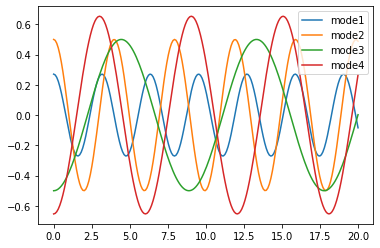

In [61]:
plt.plot(tplot, xeigplot[:,0], label="mode1")
plt.plot(tplot, xeigplot[:,1], label="mode2")
plt.plot(tplot, xeigplot[:,2], label="mode3")
plt.plot(tplot, xeigplot[:,3], label="mode4")
plt.legend()
plt.show()

In [0]:
#All curves look sinusiodial. Also looking the eigenvalues val[0]>val[1]>val[3]>val[2] this is compatible with frequencies of modes which is mode1>mode2>mode4>mode3

Visual sanity checks:
- All 4 components should be doing simple harmonic oscillations; you can visually check the plots to confirm that the motion curves roughly look sinusioidal (as opposed to having non-sinusoidal characteristics like local maxima at different heights, etc.)

Just add a verbal comment about your sanity check, no need to do any computation here.


## Appendix for Problem 1: Some tidbits about QFT and a recent BOUN Phys seminar

(This part is not required for the project, read only if you are curious, and only after you are done with the project!)

A **long** chain of pendulums coupled with springs is a prototype of a special type of **continuous medium**: 
- In the limit of a large number of pendulums, and, 
- in the limit of "long wavelengths" 
  - (meaning: in the limit where the amount of displacement changes very little as you move from pendulum to pendulum, and it changes appreciably only over large numbers of pendulums),

the equations describing this system become the Klein-Gordon equation. This equation was mentioned in a few recent homeworks. 

In the context of quantum field theory, where the K-G equation is most famously used, the pendulum displacement becomes a "field", and its "fundamental excitations" become "particles" (this is, admittedly, a bit of a weird story). In this context, the pendulum force parameter $c$ becomes a measure of the **mass squared** of the particle being described by the K-G equation.

You can also imagine having a **negative** value for $c$ in the pendulum problem. This would be something like having upside-down pendulums---the pendulum force will become positively proportional to displacement, instead of having a negative correlation with it. This would result in an **unstable** system. 

An extension of quantum field theory is **QFT on a curved spacetime**: you assume spacetime is curved as envisaged by Einstein, and try to describe the dynamics of a field that lives on this spacetime. 
- Note that this is **not** quantum gravity---in this case gravity is non-quantum, but a quantum field lives on the curved spacetime representing the gravitational field.

This sort of a setting was mentioned in a recent BOUN Phys seminar by Dr. Gizem Şengör. 

One famous curved spacetime is called the "anti-de Sitter space". Due to a very interesting phenomenon, it turns out that negative $c$ (negative mass squared!) may result in **stable behavior** in this strange space. It is as if upside-down pendulums become stable for some reason.

The talk by Dr. Şengör described de Sitter space; anti de Sitter space is in some sense the "opposite" of de Sitter space. 

- For a cute personal story involving a famous book on such topics, see [here](https://twitter.com/ArkadasOzakin/status/1238775298541457413).
- I have a personal pet project on understanding the $c<0$ stability mentioned above in elementary terms. (This may some day become a student project if I get around to it!)


# Problem 2: Epidemiology: The Susceptible-Exposed-Infected-Recovered (SEIR) Model

In this problem, we will investigate the dynamics of a simple epidemological model, namely the Susceptible-Exposed-Infected-Recovered, or SEIR model. This is a slightly **extended version** of the SIR model mentioned in Homework 4.

Say we have a population of N people, and a contagious disease is going aroud. We will make the simplifying assumption that there are four types of people:

- **S**: **Susceptible**. These people have not yet caught the disease. If they do catch it, they become **Exposed**.
- **E**: **Exposed**. These people have caught the disease, but they are **not yet infectious** themselves. After an "incubation" period, they become **Infectious**.
- **I**: **Infectious**. These people currently carry the disease, and are capable of passing it to the **Susceptible** people. Over time, they get well and become **Recovered**.
- **R**: **Recovered**. These people had the disease and they now recovered. They are immune, so they can't catch it again. They can't infect other people, either.

We will assume that these numbers change in time according to the following equations ($\beta$, $\sigma$, and $\gamma$ are constants we will specify below):

$$
\begin{eqnarray}
\frac{dS}{dt} &=& -\frac{\beta SI}{N}\\
\frac{dE}{dt} &=& \frac{\beta SI}{N} - \sigma E\\
\frac{dI}{dt} &=&  \sigma E - \gamma I\\
\frac{dR}{dt} &=& \gamma I 
\end{eqnarray}
$$

Here, 
- $\beta$ describes the rate at which infected people pass the disease to others, 
- $1/\sigma$ determines the so-called "incubation period", and 
- $\gamma$ is the rate at which infected people recover from the disease. 

> The so-called basic reproduction number $R_0$, which you may have heard about in the context of COVID-19, is given in this model by $R_0 = \beta/\gamma$---but we will not use this.



## Part 2a: Implement the `f(t, y)` function describing the equations

We have four first order differential equations for the four unknown functions of time, $S$, $E$, $I$, $R$. Since there are no second order equations, we don't need to do the "order reduction" trick this time---we just need a four-component vector
```
y = [S, E, I, R]
```
describing our variables, and an `f(t, y)` function that returns the four derivatives `[S', E', I', R']`. 

Your task is to
- **define the appropriate `f(t, v)`**

At this stage, keep the constants 
- `N`, 
- $\beta$ = `beta`, 
- $\sigma$ =`sigma`, 
- $\gamma$ = `gamma`

as undetermined variables.

#### Solution

In [0]:
def f(t, y):
  return np.array([-beta*y[0]*y[2]/N, (beta*y[0]*y[2]/N)-sigma*y[1], sigma*y[1]-gamma*y[2], gamma*y[2]])

In [63]:
# sanity check: this should print [-3, -1, -5, 9]
# do not skip the `del` line when running the sanity check!
beta  = 1
sigma = 2
gamma = 3
N     = 1
print(f(0, [1, 2, 3, 4]))
del beta, sigma, gamma, N

[-3. -1. -5.  9.]


## Part 2b: Solve the equation for an "expansion"

Use the parameter values
```
beta  = 0.4
sigma = 0.1
gamma = 0.1
N     = 10000 (number of people in the population)
```
together with the initial conditions
```
E(0) = e0 = 2000
I(0) = i0 = 1000
R(0) = r0 = 0
S(0) = s0 = N - e0 - i0 - r0
```
to solve the SEIR equations for a time range of `[0,100]`.

With this choice, the disease starts by spreading, and eventually asymptotes to an equilibrium distribution.


#### Solution

In [0]:
beta  = 0.4
sigma = 0.1
gamma = 0.1
N     = 10000
e0 = 2000
i0 = 1000
r0 = 0
s0 = N - e0 - i0 - r0 
soln1=si.solve_ivp(f, [0, 100], [s0, e0, i0, r0], dense_output=True)

## Part 2c: Visualize N gösterilecek mi?

Plot the four functions `S`, `E`, `I`, `R` for the solution found in Part 2b.



#### Solution

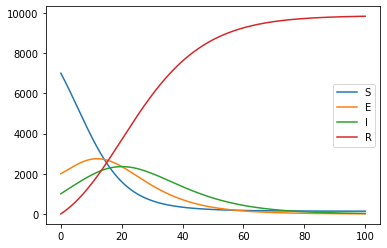

In [65]:
t=np.linspace(0, 100, 1000)
plt.plot(t, soln1.sol(t)[0], label='S')
plt.plot(t, soln1.sol(t)[1], label='E')
plt.plot(t, soln1.sol(t)[2], label='I')
plt.plot(t, soln1.sol(t)[3], label='R')
plt.legend()
plt.show()

Visual sanity checks (no need for computations):
- You should see the `E` and `I` curves peaking, and then going down to zero. The peak of `E` should happen before the peak of `I`.
- The eventual value of `R` should be equal to `N`---everybody eventually recovers, according to this model.

No need to do any computations for these checks, just add a short verbal comment.

In [0]:
#peak of E is before the peak of I and also R=10000 in the end which is the number of people in the population. 

## Part 2d: Solve the equation for a "contraction"

Next, use 
```
beta  = 0.2
sigma = 0.2
gamma = 0.4
```
together with the same `N` and the same initial conditions as in Part 2b to solve the SEIR equations for a time range of [0,100].

With this choce, the disease starts by contracting, and eventually asymptotes to an equilibrium distribution.

#### Solution

In [0]:
beta  = 0.2
sigma = 0.2
gamma = 0.4
N     = 10000
e0 = 2000
i0 = 1000
r0 = 0
s0 = N - e0 - i0 - r0 
soln2=si.solve_ivp(f, [0, 100], [s0, e0, i0, r0], dense_output=True)

## Part 2e: Visualize

Plot the four functions `S`, `E`, `I`, `R` for the solution found in Part 2d.

#### Solution

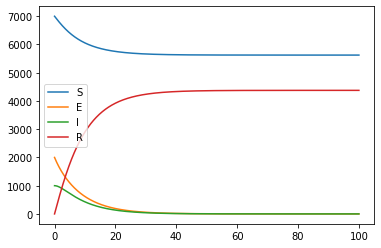

In [67]:
t=np.linspace(0, 100, 1000)
plt.plot(t, soln2.sol(t)[0], label='S')
plt.plot(t, soln2.sol(t)[1], label='E')
plt.plot(t, soln2.sol(t)[2], label='I')
plt.plot(t, soln2.sol(t)[3], label='R')
plt.legend()
plt.show()

In [0]:
#In the end R+S=10000 which is equal to N (number of people in the population).

## Appendix on Problem 2: Additional reading

Note that these are **not required reading**---check them out only if you are curious, and only after you are done with the project.

If you are curious, you can read more about the SEIR model on e.g. 
- [Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model) and the references given there, or on [this page](https://www.idmod.org/docs/hiv/model-seir.html#).

Note that we are using a special case of the SEIR model with zero birth/death rates.
